# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wanda\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('news_api')

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q='bitcoin',
    language='en',
    sort_by='relevancy'
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q='ethereum',
    language='en',
    sort_by='relevancy'
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
sentiment = []

for articles in btc_news["articles"]:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiment.append({
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'text': text
        })
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiment)
btc

,Compound,Positive,Negative,Neutral,text
0,-0.3400,0.000,0.061,0.939,When my wife started a little garden in our ur...
1,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and..."
2,0.4019,0.080,0.000,0.920,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...
3,-0.8860,0.000,0.271,0.729,"By Joe TidyCyber reporter \r\n""Follow the mone..."
4,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...
5,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich..."
6,0.5719,0.139,0.000,0.861,"After the bell today, Coinbase reported anothe..."
7,0.1280,0.089,0.075,0.836,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a..."
8,0.0000,0.000,0.000,1.000,T-Mobile is grappling with yet another reporte...
9,0.0000,0.000,0.000,1.000,Representations of cryptocurrency Bitcoin are ...


In [7]:
# Create the Ethereum sentiment scores DataFrame
sentiment = []

for articles in eth_news["articles"]:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiment.append({
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'text': text
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiment)
eth

,Compound,Positive,Negative,Neutral,text
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...
1,-0.2411,0.000,0.061,0.939,Blockchain infrastructure startups are heating...
2,0.6956,0.190,0.000,0.810,Cent was founded in 2017 as an ad-free creator...
3,0.5719,0.139,0.000,0.861,"After the bell today, Coinbase reported anothe..."
4,0.0000,0.000,0.000,1.000,Representation of the Ethereum virtual currenc...
5,0.0000,0.000,0.000,1.000,"HONG KONG, Aug 5 (Reuters) - Ether held near t..."
6,0.0000,0.000,0.000,1.000,Representations of cryptocurrencies Bitcoin an...
7,0.3400,0.105,0.000,0.895,Cryptocurrencies spiked Monday after Amazon li...
8,-0.3612,0.050,0.094,0.855,"By Mary-Ann RussonBusiness reporter, BBC News\..."
9,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu..."


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.063935,0.048700,0.033200,0.918100
std,0.410191,0.060552,0.066017,0.076228
min,-0.886000,0.000000,0.000000,0.729000
25%,-0.074000,0.000000,0.000000,0.868500
50%,0.000000,0.000000,0.000000,0.918500
75%,0.416125,0.091000,0.064500,1.000000
max,0.690800,0.178000,0.271000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.119400,0.052350,0.017600,0.930000
std,0.332101,0.064716,0.032365,0.064286
min,-0.440400,0.000000,0.000000,0.810000
25%,0.000000,0.000000,0.000000,0.879000
50%,0.000000,0.024000,0.000000,0.933500
75%,0.345300,0.082500,0.011500,1.000000
max,0.695600,0.190000,0.094000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ethereum

Q: Which coin had the highest compound score?

A: ethereum

Q. Which coin had the highest positive score?

A: ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("'s")
stop.append('it')
stop.append("n't")
stop = set(stop)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
  
    # Create a tokenized list of the words
    words = word_tokenize(text)
   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))
                 
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc['tokens'] = btc.text.apply(tokenizer)
btc

,Compound,Positive,Negative,Neutral,text,tokens
0,-0.3400,0.000,0.061,0.939,When my wife started a little garden in our ur...,"[wife, started, little, garden, urban, backyar..."
1,0.6908,0.178,0.000,0.822,"Like Dogecoin devotees, the mayor of Reno, and...","[Like, Dogecoin, devotee, mayor, Reno, leader,..."
2,0.4019,0.080,0.000,0.920,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,"[Photo, Joe, Raedle/Getty, Images, Twitter, Sq..."
3,-0.8860,0.000,0.271,0.729,"By Joe TidyCyber reporter \r\n""Follow the mone...","[Joe, TidyCyber, reporter, '', Follow, money, ..."
4,0.6240,0.127,0.000,0.873,To get a roundup of TechCrunchs biggest and mo...,"[get, roundup, TechCrunchs, biggest, important..."
5,0.2732,0.097,0.000,0.903,"As longtime TechCrunch readers know well, Mich...","[longtime, TechCrunch, reader, know, well, Mic..."
6,0.5719,0.139,0.000,0.861,"After the bell today, Coinbase reported anothe...","[bell, today, Coinbase, reported, another, per..."
7,0.1280,0.089,0.075,0.836,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a...","[SINGAPORE, July, 28, Reuters, Bitcoin, broke,..."
8,0.0000,0.000,0.000,1.000,T-Mobile is grappling with yet another reporte...,"[T-Mobile, grappling, yet, another, reported, ..."
9,0.0000,0.000,0.000,1.000,Representations of cryptocurrency Bitcoin are ...,"[Representations, cryptocurrency, Bitcoin, see..."


In [14]:
# Create a new tokens column for Ethereum
eth['tokens'] = eth.text.apply(tokenizer)
eth

,Compound,Positive,Negative,Neutral,text,tokens
0,0.3612,0.075,0.000,0.925,There are many blockchain platforms competing ...,"[many, blockchain, platform, competing, invest..."
1,-0.2411,0.000,0.061,0.939,Blockchain infrastructure startups are heating...,"[Blockchain, infrastructure, startup, heating,..."
2,0.6956,0.190,0.000,0.810,Cent was founded in 2017 as an ad-free creator...,"[Cent, founded, 2017, ad-free, creator, networ..."
3,0.5719,0.139,0.000,0.861,"After the bell today, Coinbase reported anothe...","[bell, today, Coinbase, reported, another, per..."
4,0.0000,0.000,0.000,1.000,Representation of the Ethereum virtual currenc...,"[Representation, Ethereum, virtual, currency, ..."
5,0.0000,0.000,0.000,1.000,"HONG KONG, Aug 5 (Reuters) - Ether held near t...","[HONG, KONG, Aug, 5, Reuters, Ether, held, nea..."
6,0.0000,0.000,0.000,1.000,Representations of cryptocurrencies Bitcoin an...,"[Representations, cryptocurrencies, Bitcoin, E..."
7,0.3400,0.105,0.000,0.895,Cryptocurrencies spiked Monday after Amazon li...,"[Cryptocurrencies, spiked, Monday, Amazon, lis..."
8,-0.3612,0.050,0.094,0.855,"By Mary-Ann RussonBusiness reporter, BBC News\...","[Mary-Ann, RussonBusiness, reporter, BBC, News..."
9,0.6369,0.157,0.000,0.843,"""Anthony Di Iorio, a co-founder of the Ethereu...","[``, Anthony, Di, Iorio, co-founder, Ethereum,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('illustration', 'taken'), 6),
 (('Reuters', 'Bitcoin'), 4),
 (('char', 'Representations'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('bitcoin', 'seen'), 3),
 (('seen', 'front'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('2021', 'REUTERS/Dado'), 3),
 (('taken', 'June'), 2),
 (('representation', 'virtual'), 2),
 (('front', 'stock'), 2),
 (('stock', 'graph'), 2),
 (('graph', 'illustration'), 2),
 (('taken', 'November'), 2),
 (('November', '19'), 2),
 (('19', '2020'), 2),
 (('2020', 'REUTERS/Dado'), 2),
 (('21', 'Reuters'), 2),
 (('char', 'Reuters'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('PC', 'motherboard'), 4),
 (('char', 'Representations'), 3),
 (('Ethereum', 'placed'), 3),
 (('placed', 'PC'), 3),
 (('motherboard', 'illustration'), 3),
 (('illustration', 'taken'), 3),
 (('taken', 'June'), 3),
 (('June', '29'), 3),
 (('29', '2021'), 3),
 (('2021', 'REUTERS/Dado'), 3),
 (('ether', 'burned'), 3),
 (('REUTERS/Dado', 'Ruvic/IllustrationNEW'), 2),
 (('Ruvic/IllustrationNEW', 'YORK'), 2),
 (('Aug', '5'), 2),
 (('5', 'Reuters'), 2),
 (('Representations', 'cryptocurrencies'), 2),
 (('cryptocurrencies', 'Bitcoin'), 2),
 (('Bitcoin', 'Ethereum'), 2),
 (('REUTERS/Dado', 'Ruvic/IllustrationAug'), 2),
 (('Reuters', 'Ethereum'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Reuters', 9),
 ('Bitcoin', 7),
 ('illustration', 6),
 ('taken', 6),
 ('REUTERS/Dado', 6),
 ('…', 5),
 ('July', 5),
 ('2021', 5),
 ('seen', 5)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 12),
 ('Reuters', 6),
 ('network', 5),
 ('Bitcoin', 5),
 ('blockchain', 4),
 ('’', 4),
 ('PC', 4),
 ('motherboard', 4),
 ('illustration', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

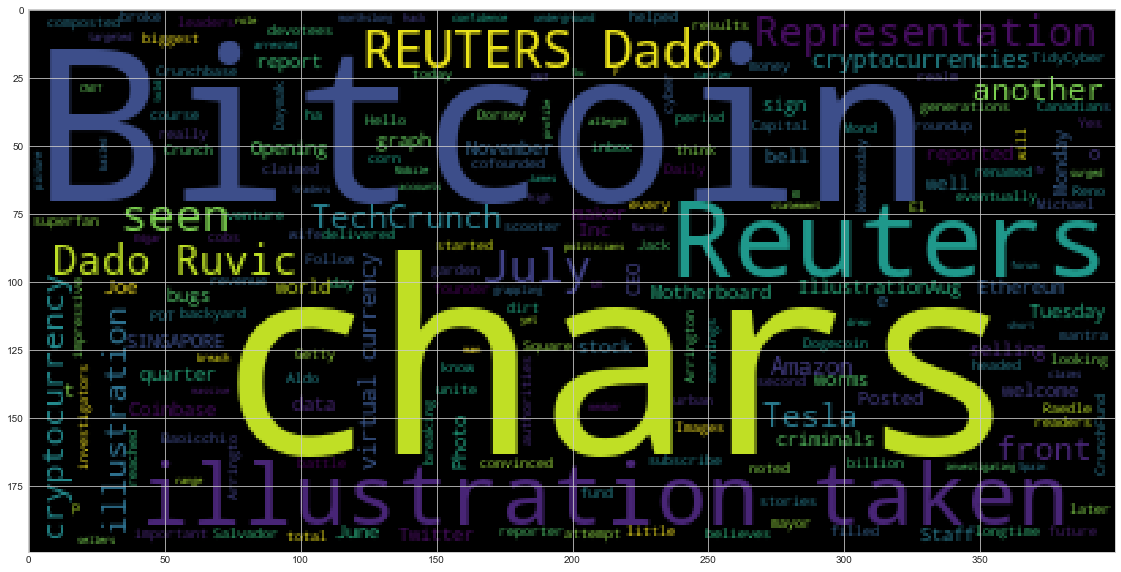

In [22]:
# Generate the Bitcoin word cloud
df_cloud = WordCloud().generate(btc.text.str.cat())
plt.imshow(df_cloud)

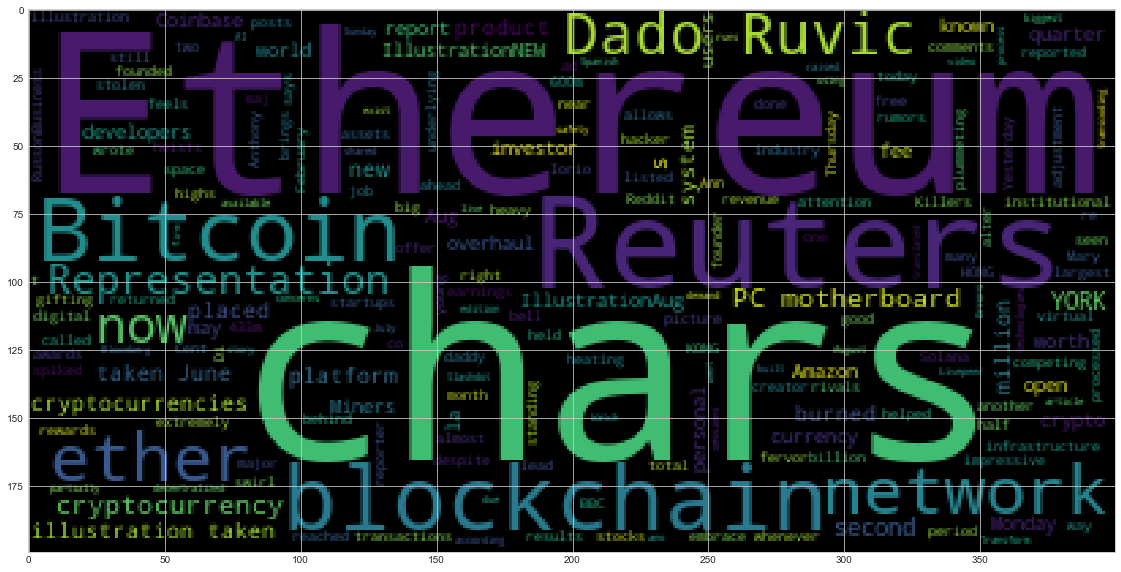

In [23]:
# Generate the Ethereum word cloud
df_cloud = WordCloud().generate(eth.text.str.cat())
plt.imshow(df_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(all_btc_text)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent', jupyter=True)

In [31]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Joe Raedle/ PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Joe PERSON
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Motherboard PERSON
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
Martin/CNET
A ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE ORG
+410 PERSON
Dado Ruvic/Illustration
Welcome ORG
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Februar

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]After the bell today, Coinbase reported another period of impressive results in its second quarter earnings report.\r\nDuring the quarter, Coinbase’s total revenue reached $2.23 billion, which helped t… [+4900 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTER

In [33]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [34]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [35]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
2017 DATE
Reddit NORP
Ethereum PERSON
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
Mary-Ann RussonBusiness PERSON
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
August 5 DATE
Sunday DATE
over 45,799 CARDINAL
second ORDINAL
Dado Ruvic PERSON
Reuters ORG
More than $144 million MONEY
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Ethereu

---